In [1]:
# Library Import
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import time
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Input
from sklearn.neural_network import MLPRegressor
from datetime import datetime

In [2]:
# Dataset Loading
data = pd.read_csv("/content/cancer_reg.csv", encoding='latin-1')
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
data.shape

(3047, 34)

In [4]:
# Minimum and Maximum values in the dataset
min_values = data.min()
max_values = data.max()

print("Minimum values in the dataset:\n", min_values)
print("\nMaximum values in the dataset:\n", max_values)

Minimum values in the dataset:
 avgAnnCount                                             6.0
avgDeathsPerYear                                          3
TARGET_deathRate                                       59.7
incidenceRate                                         201.3
medIncome                                             22640
popEst2015                                              827
povertyPercent                                          3.2
studyPerCap                                             0.0
binnedInc                                (34218.1, 37413.8]
MedianAge                                              22.3
MedianAgeMale                                          22.4
MedianAgeFemale                                        22.3
Geography                  Abbeville County, South Carolina
AvgHouseholdSize                                     0.0221
PercentMarried                                         23.1
PctNoHS18_24                                            0.0
PctHS18_

In [5]:
print(data.isnull().sum())

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [6]:
# Dropping features
data_cleaned = data.drop(columns=['Geography', 'binnedInc', 'avgDeathsPerYear', 'BirthRate',
                           'studyPerCap', 'MedianAgeMale', 'MedianAge', 'PctNoHS18_24','PctSomeCol18_24','popEst2015'])

In [7]:
# Correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Correlation with the target column
target_corr = corr_matrix['TARGET_deathRate'].sort_values(ascending=False)
print(target_corr)

TARGET_deathRate           1.000000
incidenceRate              0.449432
PctPublicCoverageAlone     0.449358
povertyPercent             0.429389
PctHS25_Over               0.404589
PctPublicCoverage          0.404572
PctUnemployed16_Over       0.378412
PctHS18_24                 0.261976
PctBlack                   0.257024
PctNoHS18_24               0.088463
MedianAgeFemale            0.012048
MedianAge                  0.004375
MedianAgeMale             -0.021929
studyPerCap               -0.022285
AvgHouseholdSize          -0.036905
BirthRate                 -0.087407
avgDeathsPerYear          -0.090715
popEst2015                -0.120073
avgAnnCount               -0.143532
PctWhite                  -0.177400
PctAsian                  -0.186331
PctSomeCol18_24           -0.188688
PctOtherRace              -0.189894
PercentMarried            -0.266820
PctEmpPrivCoverage        -0.267399
PctBachDeg18_24           -0.287817
PctMarriedHouseholds      -0.293325
PctPrivateCoverageAlone   -0

In [8]:
# Filling blank spaces
data_cleaned.fillna(data_cleaned.mean(), inplace=True)

# Splitting features (X) and target (y) from cleaned data
X = data_cleaned.drop(columns=['TARGET_deathRate'])
y = data_cleaned['TARGET_deathRate']

# Check the remaining columns
print(data_cleaned.columns)

Index(['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome',
       'povertyPercent', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')


In [9]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
# Standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[-0.37602052 -0.80227183  0.02375329 ... -0.24552062 -0.31662133
  -0.05246479]
 [-0.43887762 -1.74470349  2.5458026  ... -0.27871729 -0.53035221
   2.02699829]
 [-0.26737861 -0.33287537  2.83534964 ... -0.14461903 -0.43704778
   1.69207091]
 ...
 [-0.0213823   0.16926969  0.22875057 ...  1.24613813 -0.38072939
  -0.5488271 ]
 [ 1.05857076  0.10285231  0.32132453 ... -0.26920642 -0.52258444
   1.70623144]
 [ 0.11054001  0.55497531 -0.1288755  ... -0.18300382 -0.44952052
  -0.62624152]]
[[ 0.05932312  0.53678165 -0.23006493 ... -0.0078281  -0.2159705
   0.078824  ]
 [ 0.14158056  0.04191406  0.07468587 ...  3.38286856 -0.28875264
  -1.77034729]
 [ 0.54355561  1.10624325  2.09501131 ...  0.43688403 -0.45316879
   0.22635943]
 ...
 [ 3.43187826  0.94977776  1.12382932 ...  1.02608939  0.99733757
  -0.95673199]
 [ 1.05857076  0.10285231  1.1645416  ... -0.26032153 -0.4849094
   0.43881243]
 [-0.41870127 -0.793175   -1.10706811 ... -0.44937698 -0.4871376
   0.09705973]]


In [11]:
# Using StandardScaler to normalize the target (y)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()
print(y_train_scaled)
print(y_test_scaled)

[-1.50788127 -1.87841685 -0.17467974 ... -0.67599258 -1.54057559
  0.5300644 ]
[ 2.86673382e-01 -9.48445205e-01 -1.60148930e-01  1.05317345e+00
  4.86471977e-01  1.35468769e+00 -2.21062645e-02 -1.20636703e+00
 -1.05742626e+00  2.24917453e-01 -1.99829600e+00  4.35614153e-01
  1.58354790e+00  6.95534930e-03  2.72142575e-01  9.22396184e-01
  6.57208958e-01 -1.12644759e+00  1.90685835e+00 -4.65295875e-01
 -3.23620508e-01  7.96093838e-02 -3.63580227e-01 -5.74276927e-01
  1.37648390e+00 -4.02697731e-02 -2.57389662e-02 -1.81945140e-01
  1.86326593e+00 -1.07195706e+00  1.33289148e+00 -6.86890680e-01
  1.40917822e+00  2.43080961e-01 -5.19786401e-01  1.41365313e-01
 -1.70041446e+00  4.39246855e-01  1.04590804e+00  1.85600053e+00
 -1.11191678e+00 -2.32802965e-01  1.09313317e+00 -1.37347131e+00
  2.28550155e-01  4.31981451e-01  3.19367698e-01 -3.41784016e-01
  1.37285120e+00  3.19367698e-01  8.89701869e-01  4.69150683e-02
 -5.67011523e-01  2.25923042e+00  7.11699484e-01 -1.02473194e+00
 -1.4788196

In [12]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# prediction on test data
y_test_pred = model.predict(X_test)
# Prediction on training data
y_train_pred = model.predict(X_train)

# Calculate R-squared and MSE for both training and testing sets
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training R-Squared: {r2_train:.4f}, Training MSE: {mse_train:.4f}")
print(f"Test R-Squared: {r2_test:.4f}, Test MSE: {mse_test:.4f}")

Training R-Squared: 0.5177, Training MSE: 365.4952
Test R-Squared: 0.4903, Test MSE: 417.0545


In [14]:
# Define function to build and train the linear regression model
def train_evaluate_linear_regression(X_train, y_train, X_test, y_test, learning_rate):
    model = Sequential()
    model.add(Dense(1, input_dim=X_train.shape[1]))  # Linear regression with one output

    # Compile the model with the specified learning rate
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate R-squared
    r2 = r2_score(y_test, y_test_pred)
    print(f"Learning Rate: {learning_rate} - Test R-Squared: {r2:.4f}")

    return r2

# Learning rates to try
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

# Train and evaluate for each learning rate
for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    r2 = train_evaluate_linear_regression(X_train, y_train, X_test, y_test, lr)
    results[lr] = r2

# Optional: Print all results
print("\nFinal R-Squared values for all learning rates:")
for lr, r2 in results.items():
    print(f"Learning Rate: {lr} - R-Squared: {r2:.4f}")


Training with Learning Rate: 0.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Learning Rate: 0.1 - Test R-Squared: -1.8989

Training with Learning Rate: 0.01


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Learning Rate: 0.01 - Test R-Squared: -0.5993

Training with Learning Rate: 0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Learning Rate: 0.001 - Test R-Squared: -0.5835

Training with Learning Rate: 0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Learning Rate: 0.0001 - Test R-Squared: -1.2938

Final R-Squared values for all learning rates:
Learning Rate: 0.1 - R-Squared: -1.8989
Learning Rate: 0.01 - R-Squared: -0.5993
Learning Rate: 0.001 - R-Squared: -0.5835
Learning Rate: 0.0001 - R-Squared: -1.2938


In [13]:
def test_model(model, X_train, y_train, X_test, y_test):
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Make predictions on both training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R-squared and MSE for both training and testing sets
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)

    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Optionally calculate Mean Absolute Error (MAE)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Print or return the results
    print(f"Training R-Squared: {r2_train:.4f}, Training MSE: {mse_train:.4f}")
    print(f"Test R-Squared: {r2_test:.4f}, Test MSE: {mse_test:.4f}")

    return {
        "r2_train": r2_train,
        "mse_train": mse_train,
        "r2_test": r2_test,
        "mse_test": mse_test,
        "mae_test": mae_test
    }

In [15]:
# Neural Network
def train_evaluate_dnn(hidden_layer_sizes, X_train_scaled, y_train, X_test_scaled, y_test):
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=2000, random_state=42)
    mlp.fit(X_train_scaled, y_train)

    y_test_pred = mlp.predict(X_test_scaled)
    r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    print(f"DNN {hidden_layer_sizes} - Test R-Squared: {r2:.4f}, Test MSE: {mse:.4f}")
    return mlp
dnn_architectures = [(16,), (30, 8), (30, 16, 8), (30, 16, 8, 4)]
dnn_models = {}
for arch in dnn_architectures:
    print(f"Training DNN model with architecture {arch}...")
    model = train_evaluate_dnn(arch, X_train_scaled, y_train, X_test_scaled, y_test)
    dnn_models[arch] = model

Training DNN model with architecture (16,)...
DNN (16,) - Test R-Squared: 0.5107, Test MSE: 400.3852
Training DNN model with architecture (30, 8)...
DNN (30, 8) - Test R-Squared: 0.4967, Test MSE: 411.7901
Training DNN model with architecture (30, 16, 8)...
DNN (30, 16, 8) - Test R-Squared: 0.5073, Test MSE: 403.1353
Training DNN model with architecture (30, 16, 8, 4)...
DNN (30, 16, 8, 4) - Test R-Squared: 0.5232, Test MSE: 390.1027


In [16]:
def test_model(model, X_test_scaled, y_test):
    y_test_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    print(f"Model Test R-Squared: {r2:.4f}, Test MSE: {mse:.4f}")
    return r2, mse

In [17]:
# SGD optimizer
def train_evaluate_dnn_sgd_epochs(hidden_layer_sizes, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, learning_rate=0.001, max_epochs=100):
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, solver='sgd', learning_rate_init=learning_rate, max_iter=1, random_state=42, warm_start=True)

    training_loss = []

    # Start time
    start_time = datetime.now()
    execution_start = time.time()
    print(f"Training started at: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

    for epoch in range(1, max_epochs + 1):
        mlp.partial_fit(X_train_scaled, y_train_scaled)

        # Training
        y_train_pred_scaled = mlp.predict(X_train_scaled)

        # Inversing
        y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()

        # MSE
        train_loss = mean_squared_error(y_train, y_train_pred)
        training_loss.append(train_loss)

        print(f"Epoch {epoch}/{max_epochs} - Training Loss: {train_loss:.4f}")

    # End time
    end_time = datetime.now()
    execution_end = time.time()
    total_time = execution_end - execution_start

    print(f"Training ended at: {end_time.strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Total training time: {total_time:.2f} seconds")

    # R-squared
    y_test_pred_scaled = mlp.predict(X_test_scaled)
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
    r2_test = r2_score(y_test, y_test_pred)

    print(f"DNN {hidden_layer_sizes} with Learning Rate {learning_rate} - Final Test R-squared: {r2_test:.4f}")

    return training_loss, r2_test

In [18]:
# Plotting
def plot_loss_for_learning_rate(learning_rate, architectures, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, max_epochs=100):
    plt.figure(figsize=(10, 6))

    r2_scores = {}

    for arch in architectures:
        print(f"\nTraining DNN model with architecture {arch} and learning rate {learning_rate}...")
        training_loss, r2_test = train_evaluate_dnn_sgd_epochs(arch, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, learning_rate, max_epochs)

        plt.plot(range(1, max_epochs + 1), training_loss, label=f'Arch {arch} (R2: {r2_test:.4f})')
        r2_scores[arch] = r2_test

    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (Training Loss)')
    plt.title(f'Training Loss and R-Squared for Learning Rate {learning_rate}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Printing R-squared for all architectures for the current learning rate
    print(f"\nR-squared values for Learning Rate {learning_rate}:")
    for arch, r2 in r2_scores.items():
        print(f"Architecture {arch}: R-squared = {r2:.4f}")


Training DNN model with architecture (16,) and learning rate 0.1...
Training started at: 2024-09-25 03:15:43
Epoch 1/100 - Training Loss: 432.2947
Epoch 2/100 - Training Loss: 419.7839
Epoch 3/100 - Training Loss: 399.8328
Epoch 4/100 - Training Loss: 378.0952
Epoch 5/100 - Training Loss: 365.5566
Epoch 6/100 - Training Loss: 357.9903
Epoch 7/100 - Training Loss: 355.9987
Epoch 8/100 - Training Loss: 351.0775
Epoch 9/100 - Training Loss: 346.9522
Epoch 10/100 - Training Loss: 344.3652
Epoch 11/100 - Training Loss: 342.6885
Epoch 12/100 - Training Loss: 338.9870
Epoch 13/100 - Training Loss: 338.8379
Epoch 14/100 - Training Loss: 336.1631
Epoch 15/100 - Training Loss: 336.0715
Epoch 16/100 - Training Loss: 330.9059
Epoch 17/100 - Training Loss: 331.2130
Epoch 18/100 - Training Loss: 329.8825
Epoch 19/100 - Training Loss: 330.1135
Epoch 20/100 - Training Loss: 325.7174
Epoch 21/100 - Training Loss: 327.2320
Epoch 22/100 - Training Loss: 324.3522
Epoch 23/100 - Training Loss: 324.1606
Ep

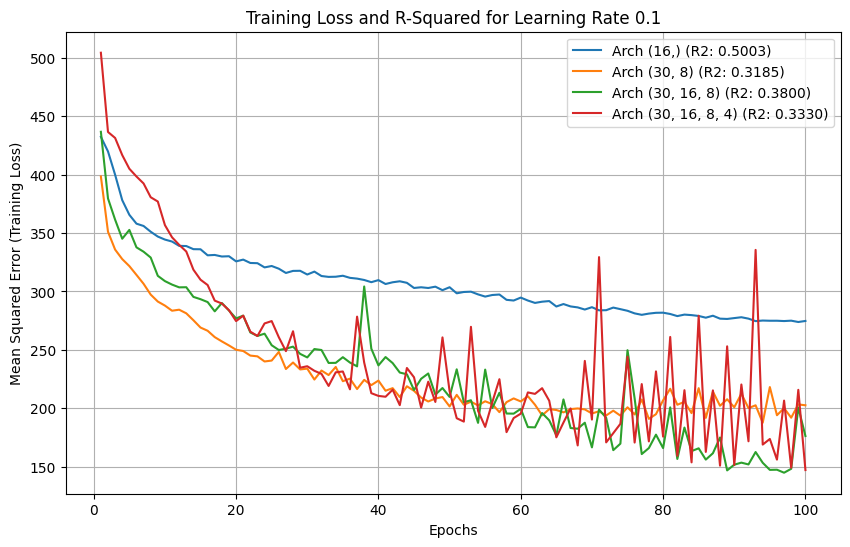


R-squared values for Learning Rate 0.1:
Architecture (16,): R-squared = 0.5003
Architecture (30, 8): R-squared = 0.3185
Architecture (30, 16, 8): R-squared = 0.3800
Architecture (30, 16, 8, 4): R-squared = 0.3330

Training DNN model with architecture (16,) and learning rate 0.01...
Training started at: 2024-09-25 03:16:03
Epoch 1/100 - Training Loss: 701.9562
Epoch 2/100 - Training Loss: 495.5386
Epoch 3/100 - Training Loss: 438.2764
Epoch 4/100 - Training Loss: 412.7435
Epoch 5/100 - Training Loss: 397.6022
Epoch 6/100 - Training Loss: 387.2966
Epoch 7/100 - Training Loss: 379.8370
Epoch 8/100 - Training Loss: 374.1047
Epoch 9/100 - Training Loss: 369.4933
Epoch 10/100 - Training Loss: 365.7054
Epoch 11/100 - Training Loss: 362.4381
Epoch 12/100 - Training Loss: 359.5681
Epoch 13/100 - Training Loss: 357.0657
Epoch 14/100 - Training Loss: 354.8440
Epoch 15/100 - Training Loss: 352.8072
Epoch 16/100 - Training Loss: 350.9412
Epoch 17/100 - Training Loss: 349.1655
Epoch 18/100 - Traini

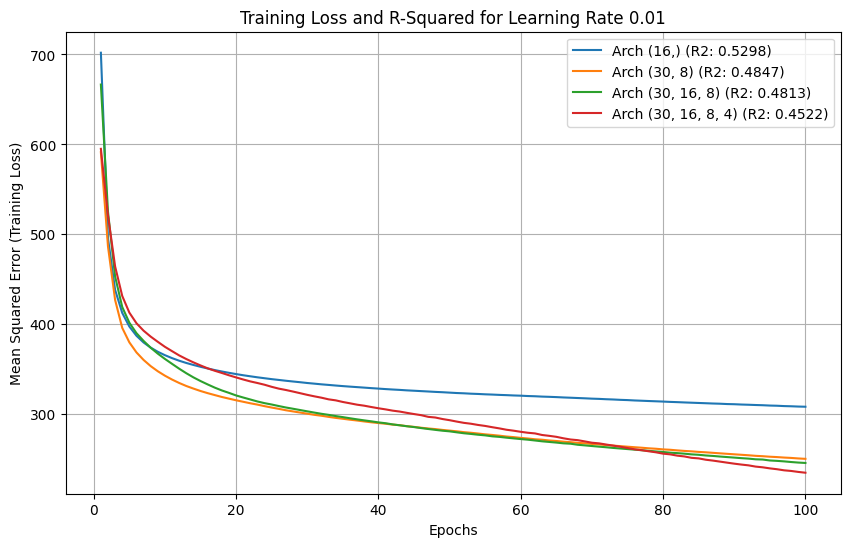


R-squared values for Learning Rate 0.01:
Architecture (16,): R-squared = 0.5298
Architecture (30, 8): R-squared = 0.4847
Architecture (30, 16, 8): R-squared = 0.4813
Architecture (30, 16, 8, 4): R-squared = 0.4522

Training DNN model with architecture (16,) and learning rate 0.001...
Training started at: 2024-09-25 03:16:15
Epoch 1/100 - Training Loss: 1154.4741
Epoch 2/100 - Training Loss: 895.1153
Epoch 3/100 - Training Loss: 798.1837
Epoch 4/100 - Training Loss: 742.7199
Epoch 5/100 - Training Loss: 701.5189
Epoch 6/100 - Training Loss: 668.8612
Epoch 7/100 - Training Loss: 641.4615
Epoch 8/100 - Training Loss: 617.9209
Epoch 9/100 - Training Loss: 597.3728
Epoch 10/100 - Training Loss: 579.2514
Epoch 11/100 - Training Loss: 563.0854
Epoch 12/100 - Training Loss: 548.5556
Epoch 13/100 - Training Loss: 535.3328
Epoch 14/100 - Training Loss: 523.4120
Epoch 15/100 - Training Loss: 512.7003
Epoch 16/100 - Training Loss: 503.0080
Epoch 17/100 - Training Loss: 494.1907
Epoch 18/100 - Tra

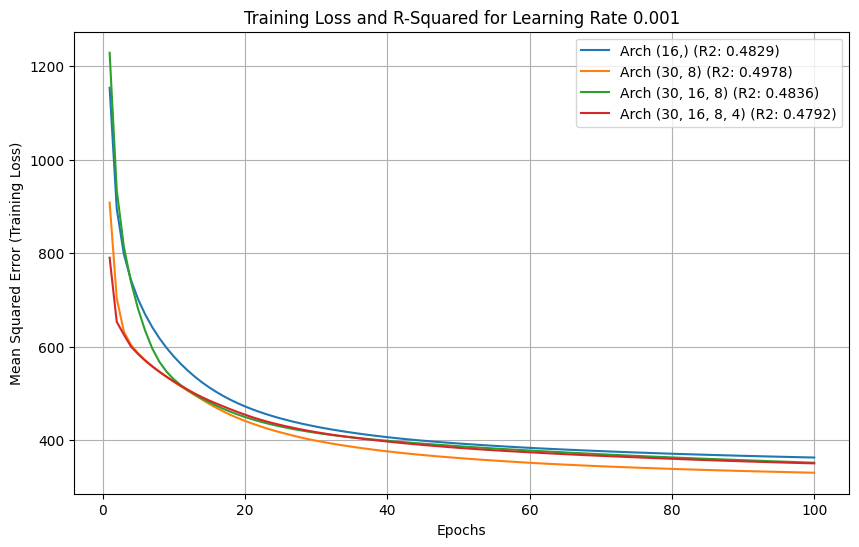


R-squared values for Learning Rate 0.001:
Architecture (16,): R-squared = 0.4829
Architecture (30, 8): R-squared = 0.4978
Architecture (30, 16, 8): R-squared = 0.4836
Architecture (30, 16, 8, 4): R-squared = 0.4792

Training DNN model with architecture (16,) and learning rate 0.0001...
Training started at: 2024-09-25 03:16:27
Epoch 1/100 - Training Loss: 1536.1558
Epoch 2/100 - Training Loss: 1449.4392
Epoch 3/100 - Training Loss: 1365.2101
Epoch 4/100 - Training Loss: 1291.8171
Epoch 5/100 - Training Loss: 1229.4312
Epoch 6/100 - Training Loss: 1176.3525
Epoch 7/100 - Training Loss: 1130.9141
Epoch 8/100 - Training Loss: 1091.8476
Epoch 9/100 - Training Loss: 1057.9200
Epoch 10/100 - Training Loss: 1028.2744
Epoch 11/100 - Training Loss: 1002.2588
Epoch 12/100 - Training Loss: 979.2445
Epoch 13/100 - Training Loss: 958.7156
Epoch 14/100 - Training Loss: 940.2945
Epoch 15/100 - Training Loss: 923.6802
Epoch 16/100 - Training Loss: 908.5877
Epoch 17/100 - Training Loss: 894.7878
Epoch 

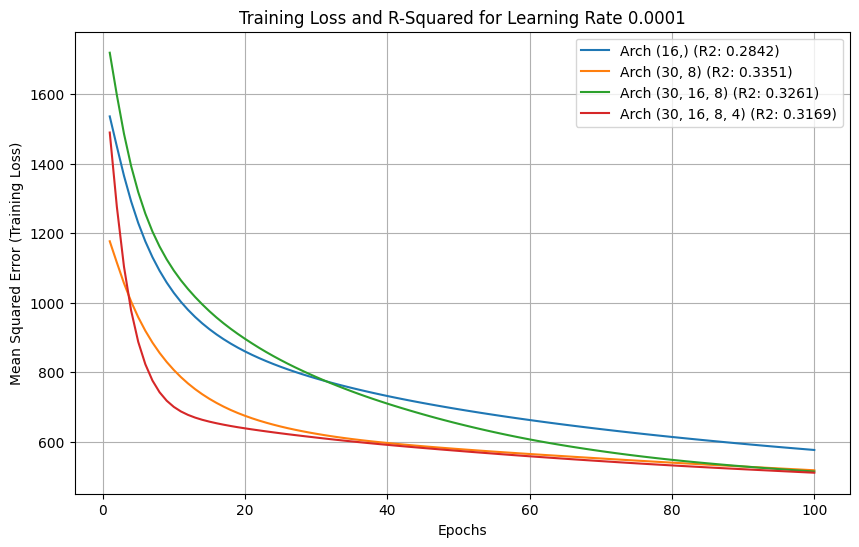


R-squared values for Learning Rate 0.0001:
Architecture (16,): R-squared = 0.2842
Architecture (30, 8): R-squared = 0.3351
Architecture (30, 16, 8): R-squared = 0.3261
Architecture (30, 16, 8, 4): R-squared = 0.3169


In [19]:
# Storing results to use them in plotting phase
results = {}

# DNN Architectures
dnn_architectures = [(16,), (30, 8), (30, 16, 8), (30, 16, 8, 4)]

# Learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    plot_loss_for_learning_rate(lr, dnn_architectures, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, max_epochs=100)
